# Analizando imágenes en Python

Las imagenes digitales son estructuras matemáticas que almacenan información sobre color y brillo en formato numérico. Estos valores son leídos y traducidos por los ordenadores para convertirlos en imágenes digitales.

Estas nociones son la base para poder empezar a trabajar en el procesamiento de imágenes. 


## Imágenes en blanco y negro

Las imágenes digitales en blanco y negro se conforman de una matriz que almacena valores en la escala de grises. Cada valor en la cuadrícula se denomina pixel. 

Por lo general, un valor de 0 indica negro y un valor 255 indica blanco, mientras que los valores intermedios son grises.



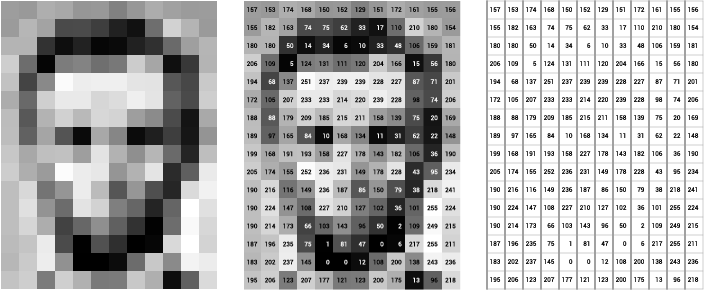

## Imágenes a color
En las imágenes a color, los valores se almacenan en un conjunto de tres matrices. Cada pixel se compone de tres valores, cada uno de los cuales es un valor en escala RBG (Red, Blue, Green).



<center><img src='https://www.researchgate.net/profile/Bhupendra-Pratap-Singh/publication/282798184/figure/fig15/AS:283989639221249@1444719814399/Color-image-representation-and-RGB-matrix.png' width="600"></center>




## Procesando imágenes con Python

Vamos a poner en práctica la teórica utilizando esta foto de una golondrina

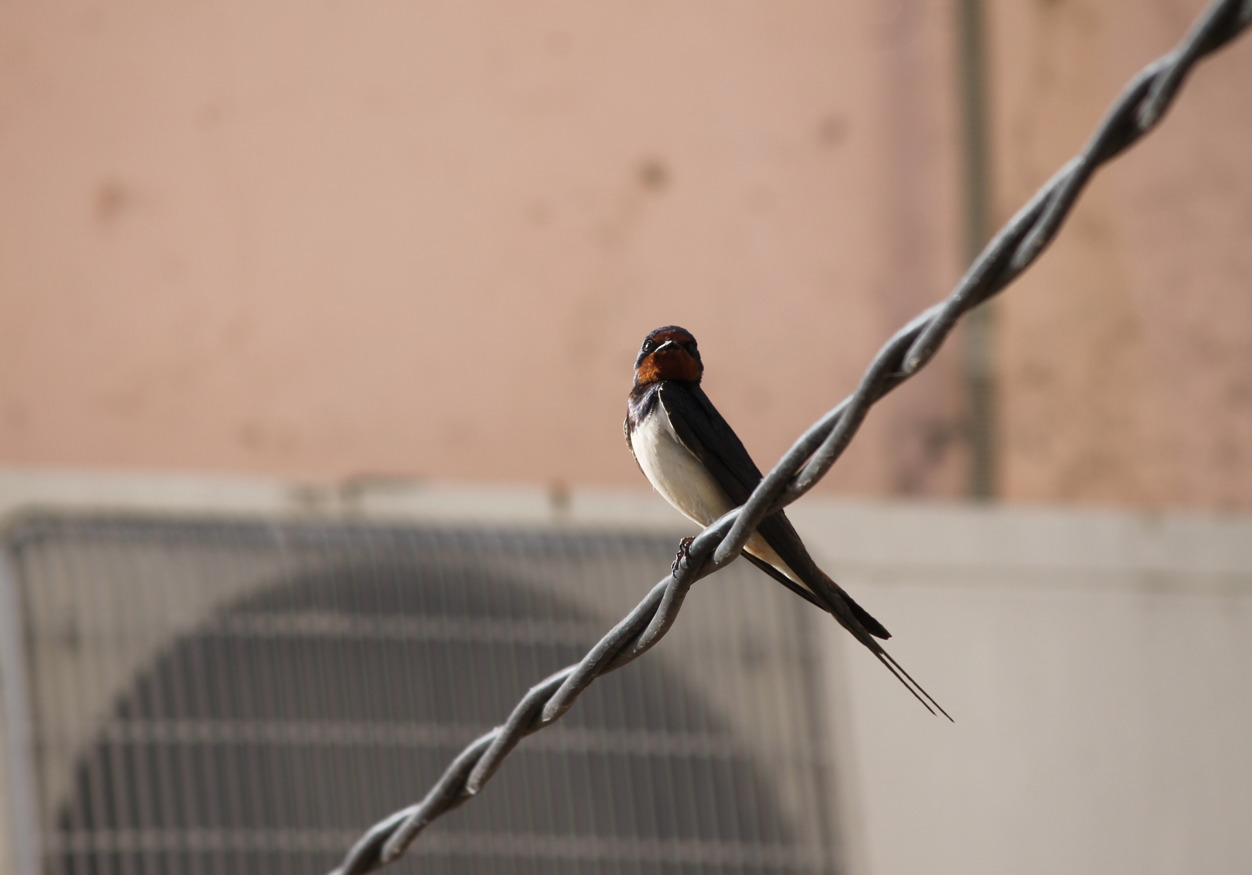

En este [link](https://github.com/jcanalesluna/courses_materials/blob/master/images/golondrina.jpg) de Github se encuentra la foto de la golondrina. Para acceder a ello, sólo tenemos que  utilizar la función `get()`, del paquete `requests`, añadiendo la dirección de la imagen. 

La dirección la encontramos haciendo click con el botón derecho sobre la imagen y copiando el enlace de la imagen




In [1]:
"""
!pip install requests
!pip install PIL
!pip install numpy
!pip install matplotlib
"""

import requests

# Python Imaging Library (PIL) permite capacidades de procesamiento de imágenes a Python
from PIL import Image

# Usaremos numpy para trabajar con las matrices
import numpy as np

# matplotlib.image es un módulo que permite mostrar imágenes como arrays de números
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 

In [3]:
url = 'https://github.com/jcanalesluna/courses_materials/blob/master/images/golondrina.jpg?raw=true'
response = requests.get(url, stream=True)


### Imagenes con PIL

In [4]:
# Accedemos a la imagen utilizando PIL
img = Image.open(response.raw)

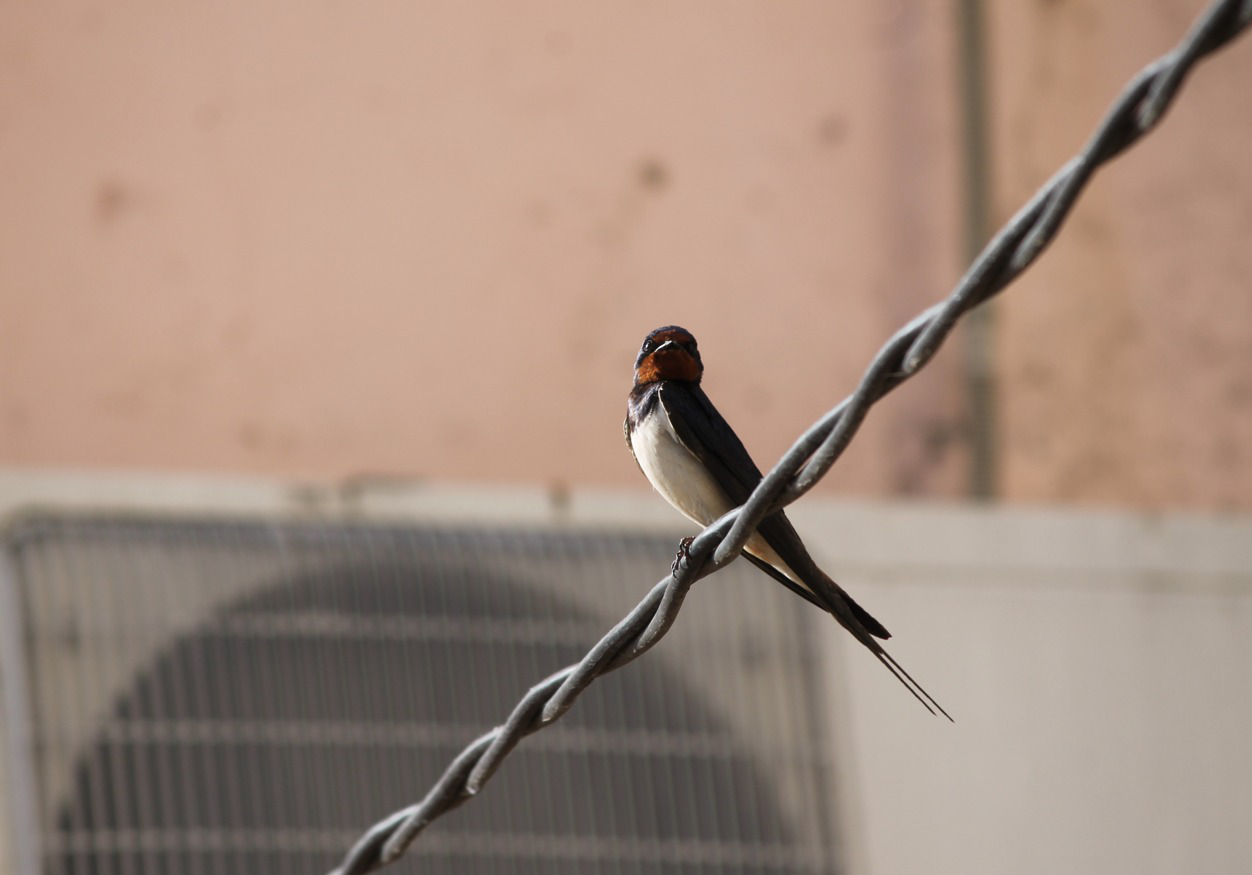

In [5]:
img

In [6]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [7]:
# ver resolución, formato y tipo de imagen
print(img.size)
print(img.format)
print(img.mode)

(1252, 875)
JPEG
RGB


### De imagen a array

In [8]:
# Vamos a convertir la foto en array
img_array= np.array(img)

In [9]:
img_array

array([[[188, 150, 131],
        [187, 149, 130],
        [187, 149, 130],
        ...,
        [ 78,  79,  74],
        [ 84,  85,  80],
        [ 87,  88,  83]],

       [[187, 149, 130],
        [187, 149, 130],
        [187, 149, 130],
        ...,
        [ 79,  80,  75],
        [ 85,  86,  81],
        [ 87,  88,  83]],

       [[187, 149, 130],
        [187, 149, 130],
        [187, 149, 130],
        ...,
        [ 79,  80,  75],
        [ 85,  86,  81],
        [ 87,  88,  83]],

       ...,

       [[165, 152, 136],
        [163, 150, 134],
        [162, 149, 133],
        ...,
        [170, 160, 151],
        [170, 160, 151],
        [171, 161, 152]],

       [[165, 152, 136],
        [163, 150, 134],
        [162, 149, 133],
        ...,
        [170, 160, 151],
        [170, 160, 151],
        [171, 161, 152]],

       [[165, 152, 136],
        [163, 150, 134],
        [162, 149, 133],
        ...,
        [170, 160, 151],
        [170, 160, 151],
        [171, 161, 152]]

In [10]:
# Como es una foto a color, tenemos tres dimensiones
img_array.ndim

3

In [11]:
img_array.shape

(875, 1252, 3)

Para calcular el número de pixeles, solo tenemos que calcular el ancho por el largo

In [12]:
pixels = img_array.shape[0] * img_array.shape[1]
pixels

1095500

Si quisiéramos convertir a megapixels, utilizamos la siguiente fórmula:

In [13]:
mp = pixels / 1000000
mp

1.0955

Utilizamos la función `plt.imshow()`para ver la imagen con ejes

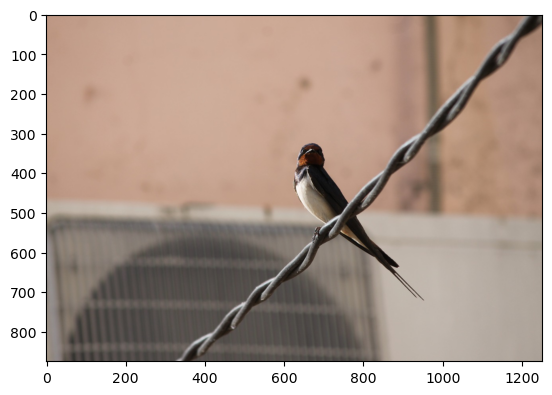

In [14]:
plt.imshow(img)
plt.show()

## Jugando con imágenes digitales

La ventaja de las imágenes pixeladas, es que podemos hacer todo tipo de manipulaciones sobre ellas con nuestro ordenador, como hace cualquier programa de manipulación de imágenes como PhotoShop

(950, 700)


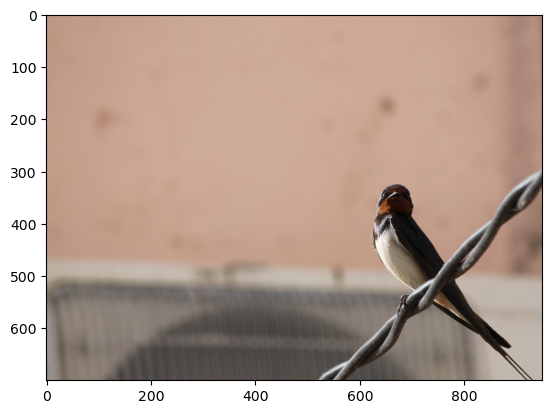

In [17]:
# Recortar imagen
cropped_img = img.crop((0, 0, 950, 700))
print(cropped_img.size)
plt.imshow(cropped_img)
plt.show()

(450, 400)


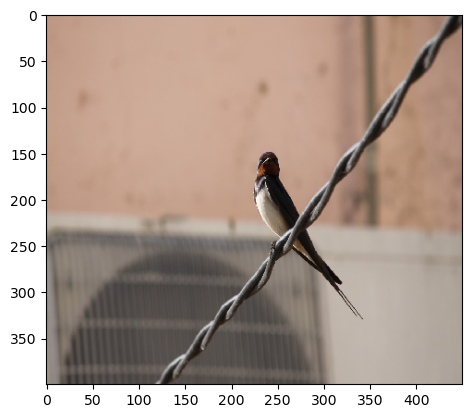

In [19]:
# Cambiar resolución imagen
low_res_img = img.resize((450,400),resample=Image.NEAREST)
print(low_res_img.size)
plt.imshow(low_res_img)
plt.show()

In [ ]:
img.size

(450, 400)


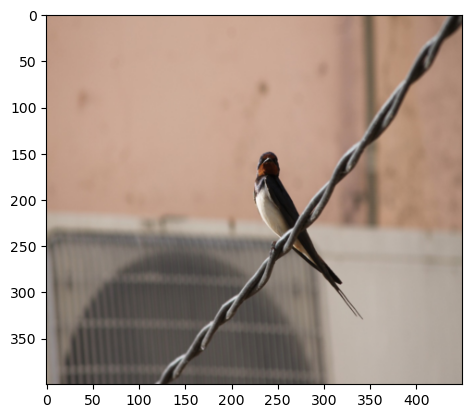

In [20]:
low_res_img = img.resize((450,400),resample=Image.BILINEAR)
print(low_res_img.size)
plt.imshow(low_res_img)
plt.show()

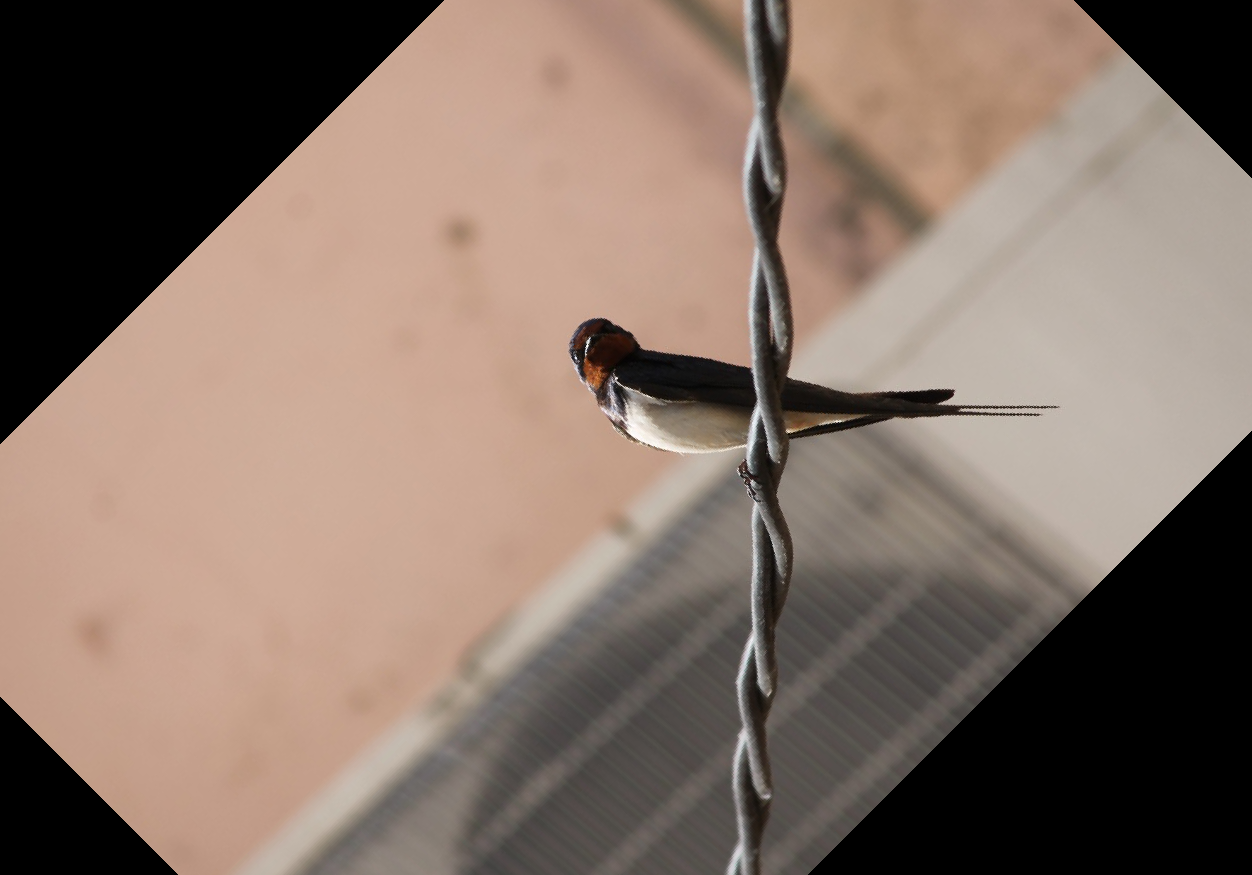

In [21]:
# Rotar
rotated_img = img.rotate(45)
rotated_img

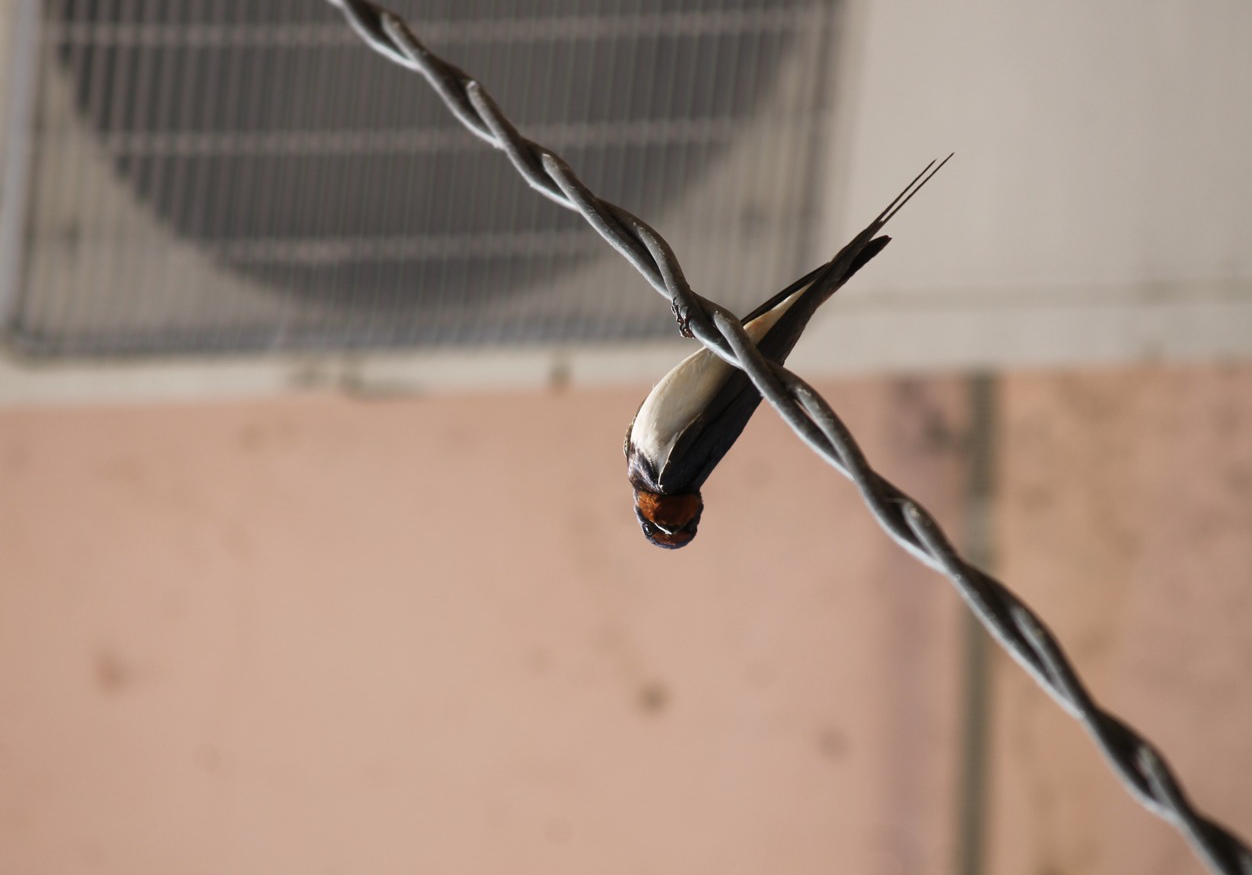

In [22]:
# Tranponer
converted_img = img.transpose(Image.FLIP_TOP_BOTTOM)
converted_img

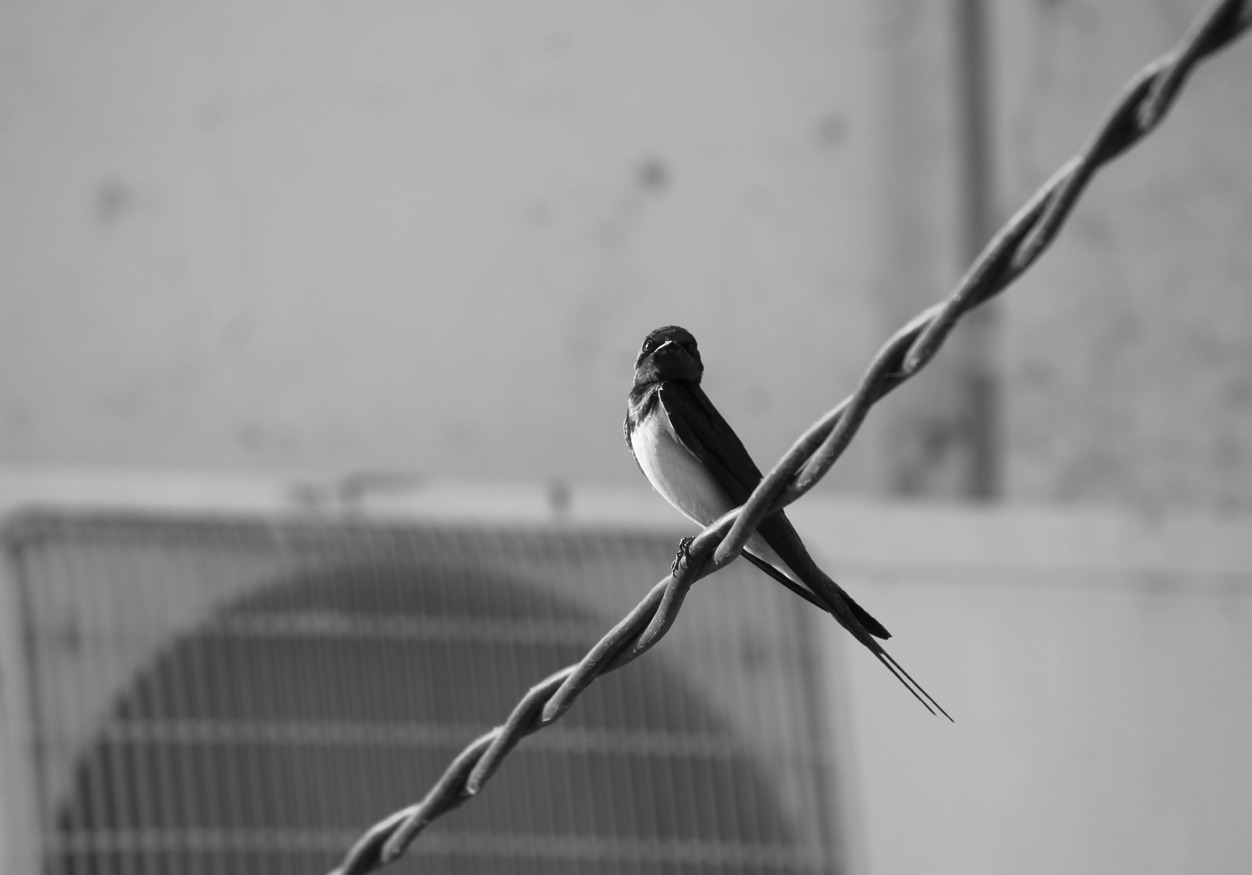

In [23]:
# Convertir a blanco y negro
gray_img = img.convert("L")  
gray_img

In [24]:
gray_img_array= np.array(gray_img)

In [25]:
gray_img_array.ndim

2

In [27]:
gray_img_array.shape

(875, 1252)